<a href="https://colab.research.google.com/github/itzobsessed/hello-world/blob/master/Moving_Average_Stock_Trading_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries (Possibly needed)

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Importing Yahoo Finance

!pip install yfinance 
 
import yfinance as yf 

In [ ]:
#Importing needed functions from datetime Library
from datetime import datetime, timedelta

In [ ]:
#Stock Information and Table

Today = datetime.now().date()
print("Today's Date is:",Today)

Stock = 'KR'

df = yf.download(Stock,'2013-01-01',Today+timedelta(days=1))
#Note: The Closing Date argument adds a day to get the closing price. Meaning without editing the current code the algorithm can only be applied after
#Market Close (Approx 4:00pm EST) 

print(df)

Today's Date is: 2022-01-14
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  13.170000  13.205000  13.060000  13.185000  11.259493   7392800
2013-01-03  13.170000  13.275000  13.125000  13.195000  11.268032   5841800
2013-01-04  13.215000  13.255000  13.115000  13.230000  11.297918   7105000
2013-01-07  13.190000  13.225000  12.880000  12.910000  11.024654   7604600
2013-01-08  12.900000  12.920000  12.610000  12.640000  10.794087  11488600
...               ...        ...        ...        ...        ...       ...
2022-01-07  47.250000  48.889999  47.139999  48.119999  48.119999   8672700
2022-01-10  48.290001  49.580002  48.150002  49.099998  49.099998  10632300
2022-01-11  49.110001  49.689999  47.330002  47.709999  47.709999   8873500
2022-01-12  47.049999  47.270000  46.169998  47.139999  47.139999  

In [ ]:
df.shape

(2276, 6)

In [ ]:
#Today's Closing Price

for i in df['Close']:
  TodaysClosingPrice=i
print("The Closing Price of %s today was $%.2f"%(Stock,TodaysClosingPrice))

The Closing Price of KR today was $49.48


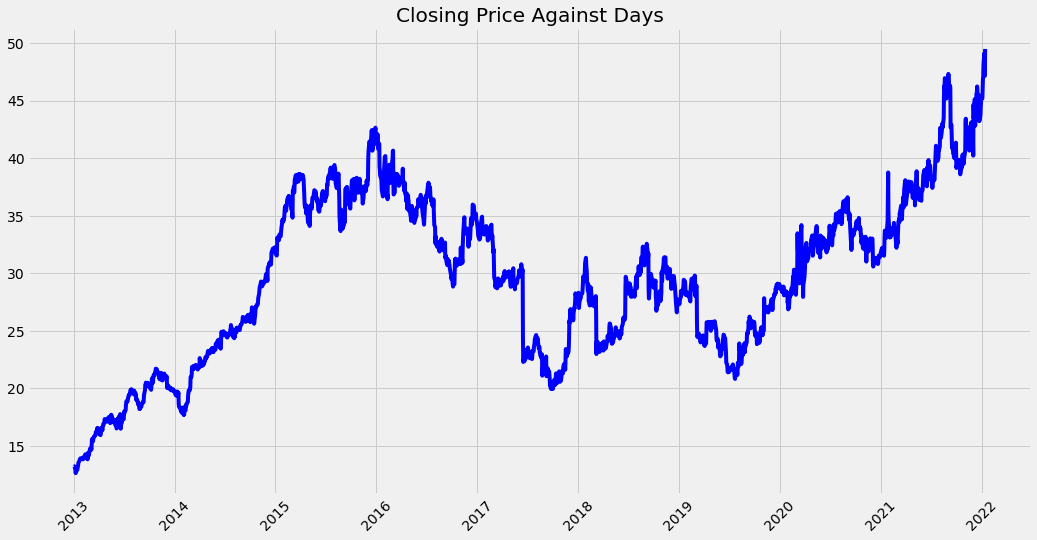

In [ ]:
#Plotting Closing Prices against Days Pandas in Python

#df_2014 = df.loc['2014-01-01':Today]
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.title('Closing Price Against Days')
plt.plot(df['Close'], color='blue')
#plt.plot(df_2014['Close'], color='blue')

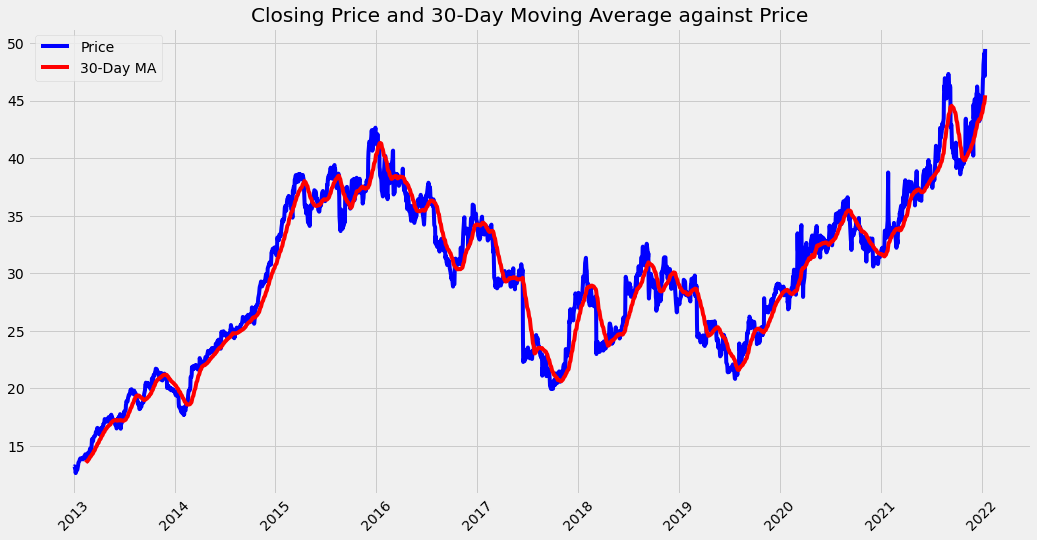

In [ ]:
##Creating 30-Day Moving Average Plot of Closing Prices

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)

#Window size = rolling Mean Period
#ThirtyDaySMA=df_2014['Close'].rolling(window=30).mean()
ThirtyDaySMA=df['Close'].rolling(window=30).mean()
plt.title('Closing Price and 30-Day Moving Average against Price')
plt.plot(df['Close'], color='blue')
plt.plot(ThirtyDaySMA, color='red')
plt.legend(["Price","30-Day MA"])

In [ ]:
df['30-Day MA'] = ThirtyDaySMA
df

,Open,High,Low,Close,Adj Close,Volume,30-Day MA
Date,,,,,,,
2013-01-02,13.170000,13.205000,13.060000,13.185000,11.259493,7392800,NaN
2013-01-03,13.170000,13.275000,13.125000,13.195000,11.268032,5841800,NaN
2013-01-04,13.215000,13.255000,13.115000,13.230000,11.297918,7105000,NaN
2013-01-07,13.190000,13.225000,12.880000,12.910000,11.024654,7604600,NaN
2013-01-08,12.900000,12.920000,12.610000,12.640000,10.794087,11488600,NaN
...,...,...,...,...,...,...,...
2022-01-07,47.250000,48.889999,47.139999,48.119999,48.119999,8672700,44.583333
2022-01-10,48.290001,49.580002,48.150002,49.099998,49.099998,10632300,44.782000
2022-01-11,49.110001,49.689999,47.330002,47.709999,47.709999,8873500,44.960666


In [ ]:
#Remove NaN values before SD Calculation
dfNaValuesDropped = df.dropna()
dfNaValuesDropped.head()

,Open,High,Low,Close,Adj Close,Volume,30-Day MA
Date,,,,,,,
2013-02-13,14.250,14.300,14.185,14.230,12.216089,5036200,13.562167
2013-02-14,14.155,14.205,14.090,14.120,12.121658,8496000,13.593333
2013-02-15,14.085,14.105,13.900,13.945,11.971424,12215000,13.618333
2013-02-19,14.005,14.125,14.000,14.105,12.108779,7671400,13.647500
2013-02-20,14.080,14.090,13.820,13.835,11.876994,8541800,13.678333


In [ ]:
dfNaValuesDropped['Price - MA'] = dfNaValuesDropped['Close'] - ThirtyDaySMA
dfNaValuesDropped

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,30-Day MA,Price - MA
Date,,,,,,,,
2013-02-13,14.250000,14.300000,14.185000,14.230000,12.216089,5036200,13.562167,0.667833
2013-02-14,14.155000,14.205000,14.090000,14.120000,12.121658,8496000,13.593333,0.526667
2013-02-15,14.085000,14.105000,13.900000,13.945000,11.971424,12215000,13.618333,0.326666
2013-02-19,14.005000,14.125000,14.000000,14.105000,12.108779,7671400,13.647500,0.457500
2013-02-20,14.080000,14.090000,13.820000,13.835000,11.876994,8541800,13.678333,0.156667
...,...,...,...,...,...,...,...,...
2022-01-07,47.250000,48.889999,47.139999,48.119999,48.119999,8672700,44.583333,3.536666
2022-01-10,48.290001,49.580002,48.150002,49.099998,49.099998,10632300,44.782000,4.317999
2022-01-11,49.110001,49.689999,47.330002,47.709999,47.709999,8873500,44.960666,2.749333


In [ ]:
shape = dfNaValuesDropped.shape
print(shape)

(2247, 8)


In [ ]:
#Analysis of the relationship between the Price and th MA Using the 'Price - MA' field

#According to General Statistics, when looking at a bell curve;
# 68% of the measures lies within 1 standard deviation of the mean.
# 95% of the distribution lies within 2 standard deviations of the mean 
# 99.7% of the measures fall within 3 standard deviations of it
Difference=dfNaValuesDropped['Price - MA']
MaximumDifference = Difference.max()
MinimumDifference = Difference.min()
AverageDifference = Difference.mean()
StandardDeviation = Difference.std()

print("Highest Ever Deviation from MA:",MaximumDifference)
print("Highest Ever Negative Deviation from MA:",MinimumDifference)
print("Average Deviation from MA:",AverageDifference)
print("The Standard Deviation of the Deviation from MA:",StandardDeviation)

#Will be using the 2 SD Measure to predict with 90 - 95 percent accuracy the range which we have come to see as the normal range of the difference between
#the standard deviation and the Price of the Stock
print("The Two Standard Deviation of the Deviation from MA:",(2*StandardDeviation))

Highest Ever Deviation from MA: 6.358333524068193
Highest Ever Negative Deviation from MA: -6.923332532246906
Average Deviation from MA: 0.2087871936322176
The Standard Deviation of the Deviation from MA: 1.5141550533755992
The Two Standard Deviation of the Deviation from MA: 3.0283101067511984


In [ ]:
#Using the Quantile function to find the 5th and 95th percentile Price SMA Difference
#Quartiles
NinetiethPercentileDifference=Difference.quantile(0.95)
TenthPercentileDifference=Difference.quantile(0.05)

print("95th percentile of differnece from MA:",NinetiethPercentileDifference)
print("5th percentile of differnece from MA:",TenthPercentileDifference)

95th percentile of differnece from MA: 2.4212347666422525
5th percentile of differnece from MA: -2.5755008824666348


In [ ]:
#Using 1 SD to predict anomalous price points and return to normal range about 68% of the time

PriceDeviationCeil=(AverageDifference + StandardDeviation)
PriceDeviationFloor=(AverageDifference - StandardDeviation)
print("Thus if the price is more than $%.2f above the 30-day SMA or more than $%.2f below the 30-day SMA, it is at an anomalous price point."%(PriceDeviationCeil,abs(PriceDeviationFloor)))
print("Meaning it can be shorted or gone long on, and given a reasonable time, the price should return to it's normal price range thus providing profit to a trader about 70% of the time.")

Thus if the price is more than $1.72 above the 30-day SMA or more than $1.31 below the 30-day SMA, it is at an anomalous price point.
Meaning it can be shorted or gone long on, and given a reasonable time, the price should return to it's normal price range thus providing profit to a trader about 70% of the time.


In [ ]:
#Using 2 SD to predict anomalous price points and return to normal range about 90-95% of the time

PriceDeviationCeil2=(AverageDifference + NinetiethPercentileDifference)
PriceDeviationFloor2=(AverageDifference - TenthPercentileDifference)
print("Thus if the price is more than $%.2f above the 30-day SMA or more than $%.2f below the 30-day SMA, it is at an anomalous price point."%(PriceDeviationCeil2,abs(PriceDeviationFloor2)))
print("Meaning it can be shorted or gone long on, and given a reasonable time, the price should return to it's normal price range thus providing profit to a trader about 90% 0f the time.")

Thus if the price is more than $2.63 above the 30-day SMA or more than $2.78 below the 30-day SMA, it is at an anomalous price point.
Meaning it can be shorted or gone long on, and given a reasonable time, the price should return to it's normal price range thus providing profit to a trader about 90% 0f the time.


In [ ]:
#Given Input of Current Closing Stock Price

#Rought estimation of Optimum Price points to consider buying options for stock with above 90% chance of profit given reasonable time frame
#Using Moving average of today
for i in dfNaValuesDropped['30-Day MA']:
  MostRecentThirtyDayMovingAveragePrice = i
#print(MostRecentThirtyDayMovingAveragePrice)

OptimumPriceforCall = MostRecentThirtyDayMovingAveragePrice + PriceDeviationCeil2  
OptimumPriceforPut= MostRecentThirtyDayMovingAveragePrice - PriceDeviationFloor2
print("Given current stock price of $%.2f for %s, the best price price point to buy a call is when the price is above $%.2f. At this price you are guranteed profit"%(TodaysClosingPrice,Stock,OptimumPriceforCall))
print("given a reasonable time frame 90-95% of the time")

print("\nGiven current stock price of $%.2f for %s, the best price price point to buy a put is when the price is below $%.2f. At this price you are guranteed profit"%(TodaysClosingPrice,Stock,OptimumPriceforPut))
print("given a reasonable time frame 90-95% of the time")


Given current stock price of $49.48 for KR, the best price price point to buy a call is when the price is above $48.09. At this price you are guranteed profit
given a reasonable time frame 90-95% of the time

Given current stock price of $49.48 for KR, the best price price point to buy a put is when the price is below $42.67. At this price you are guranteed profit
given a reasonable time frame 90-95% of the time


In [ ]:
#Number of Times Price Closed 1 SD above or Below SMA (Anomalous)
NumberOfTimesPriceWasAnomalous=0
for i in (dfNaValuesDropped['Price - MA']):
  #print(i)
  if (i > PriceDeviationCeil or i < PriceDeviationFloor): 
    NumberOfTimesPriceWasAnomalous+=1

print("The price of the stock closed out of your range",NumberOfTimesPriceWasAnomalous,"days out of the dataset of",shape[0],"days")

Percentage=((NumberOfTimesPriceWasAnomalous)/(shape[0]))*100
#print("%.16f "%(Percentage))

print("The price has only ever been outside the 1 S.D range %.2f percent of the time"%(Percentage))

The price of the stock closed out of your range 595 days out of the dataset of 2247 days
The price has only ever been outside the 1 S.D range 26.48 percent of the time


In [ ]:
#Number of Times Price Closed 2 SD above or Below SMA (Very Anomalous)
NumberOfTimesPriceWasVeryAnomalous=0
for i in (dfNaValuesDropped['Price - MA']):
  #print(i)
  if (i > NinetiethPercentileDifference or i < TenthPercentileDifference): 
    NumberOfTimesPriceWasVeryAnomalous+=1

print("The price of the stock closed out of your range",NumberOfTimesPriceWasVeryAnomalous,"days out of the dataset of",shape[0],"days")

Percentage=((NumberOfTimesPriceWasVeryAnomalous)/(shape[0]))*100
#print("%.16f "%(Percentage))

print("The price has only ever closed outside the 2 S.D. range %.2f percent of the time"%(Percentage))

The price of the stock closed out of your range 226 days out of the dataset of 2247 days
The price has only ever closed outside the 2 S.D. range 10.06 percent of the time


In [ ]:
#Reprint of Table without NaN values for the '30-Day moving average' and consequently the 'Price - MA' fields
print(dfNaValuesDropped)

                 Open       High        Low  ...    Volume  30-Day MA  Price - MA
Date                                         ...                                 
2013-02-13  14.250000  14.300000  14.185000  ...   5036200  13.562167    0.667833
2013-02-14  14.155000  14.205000  14.090000  ...   8496000  13.593333    0.526667
2013-02-15  14.085000  14.105000  13.900000  ...  12215000  13.618333    0.326666
2013-02-19  14.005000  14.125000  14.000000  ...   7671400  13.647500    0.457500
2013-02-20  14.080000  14.090000  13.820000  ...   8541800  13.678333    0.156667
...               ...        ...        ...  ...       ...        ...         ...
2022-01-07  47.250000  48.889999  47.139999  ...   8672700  44.583333    3.536666
2022-01-10  48.290001  49.580002  48.150002  ...  10632300  44.782000    4.317999
2022-01-11  49.110001  49.689999  47.330002  ...   8873500  44.960666    2.749333
2022-01-12  47.049999  47.270000  46.169998  ...   6787000  45.147666    1.992333
2022-01-13  47.2

In [ ]:
#Table of only the days where the Prices closed at a very anomalous point relative to the 30-Day MA (where 'Price - MA' was outside its 2 SD range)

PricesGreaterThanTwoSDFilter = (dfNaValuesDropped['Price - MA'] > NinetiethPercentileDifference)
NegativePriceGreaterThanTwoSDFilter = (dfNaValuesDropped['Price - MA'] < TenthPercentileDifference)
VeryAnomalousPrices = dfNaValuesDropped[PricesGreaterThanTwoSDFilter | NegativePriceGreaterThanTwoSDFilter]
#print(PricesGreaterThanTwoSDFilter)
print(VeryAnomalousPrices)

                 Open       High        Low  ...    Volume  30-Day MA  Price - MA
Date                                         ...                                 
2014-03-05  21.219999  21.865000  21.139999  ...  20707000  18.987667    2.852334
2014-03-06  22.410000  22.625000  21.549999  ...  25929800  19.103333    2.581666
2014-03-07  21.745001  22.184999  21.690001  ...  17548400  19.226333    2.663666
2014-03-10  21.850000  21.905001  21.799999  ...  11286200  19.354166    2.520834
2015-02-04  35.275002  35.805000  35.209999  ...  11593400  33.231500    2.443500
...               ...        ...        ...  ...       ...        ...         ...
2022-01-06  47.020000  47.430000  46.349998  ...   7115600  44.397333    2.722666
2022-01-07  47.250000  48.889999  47.139999  ...   8672700  44.583333    3.536666
2022-01-10  48.290001  49.580002  48.150002  ...  10632300  44.782000    4.317999
2022-01-11  49.110001  49.689999  47.330002  ...   8873500  44.960666    2.749333
2022-01-13  47.2

In [ ]:
#Putting Together a List which contains Stints of days (Consecutive days where prices were very anomalous)
#This is to calculate when the price did close at an Anomalous price point it dropped or went up by this much, and it took an average of this long give or take this number of days
import itertools
from datetime import timedelta, date

print(VeryAnomalousPrices.index)

#print(Today + timedelta(days=5)) #adding 5 days to Today's Date
new_veryanomalousprices = [(VeryAnomalousPrices.index[i+1] - VeryAnomalousPrices.index[i], VeryAnomalousPrices.index[i]) for i in range (len(VeryAnomalousPrices.index)-1)]
veryanomalousprices = [[veryanomalousprices,[c for _, c in b]] for veryanomalousprices, b in itertools.groupby (new_veryanomalousprices, key=lambda x:x[0] < (timedelta(days=5)))]
final_dates = [veryanomalousprices[i][-1]+[veryanomalousprices[i+1][-1][0]] if veryanomalousprices[i+1][-1][0] - veryanomalousprices[i][-1][-1] < (timedelta(days=5)) else veryanomalousprices[i][-1] for i in range(len(veryanomalousprices)-1) if veryanomalousprices[i][0]]
print(final_dates)

#for i in final_dates:
  #for j in i:
    #new_Final_Dates=datetime.strptime('j', '%Y-%m-%d %I:%M:%S').date()
#Grouped= new_Final_Dates.strftime('%d%b%Y')
#print(Grouped)

DatetimeIndex(['2014-03-05', '2014-03-06', '2014-03-07', '2014-03-10',
               '2015-02-04', '2015-02-05', '2015-04-22', '2015-04-28',
               '2015-04-29', '2015-04-30',
               ...
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-10',
               '2022-01-11', '2022-01-13'],
              dtype='datetime64[ns]', name='Date', length=226, freq=None)
[[Timestamp('2014-03-05 00:00:00'), Timestamp('2014-03-06 00:00:00'), Timestamp('2014-03-07 00:00:00'), Timestamp('2014-03-10 00:00:00')], [Timestamp('2015-02-04 00:00:00'), Timestamp('2015-02-05 00:00:00')], [Timestamp('2015-04-28 00:00:00'), Timestamp('2015-04-29 00:00:00'), Timestamp('2015-04-30 00:00:00')], [Timestamp('2015-08-21 00:00:00'), Timestamp('2015-08-24 00:00:00'), Timestamp('2015-08-25 00:00:00'), Timestamp('2015-08-26 00:00:00'), Timestamp('2015-08-28 00:00:00'), Timestamp('2015-08-31 00:00:00'), Timestamp('2015-09

In [ ]:
#Finding the average number of days spent outside 2 S.D Range

DateLengthList=[]
for i in (final_dates):
  NumberofDaysInARow=len(i)
  #print(NumberofDaysInARow)
  DateLengthList.append(NumberofDaysInARow)

print("List of number of days in a stint:",DateLengthList)
print("Length of list with number of days in stint:",len(DateLengthList))

AverageTimeSpentOutsideRange = ((sum(DateLengthList))/(len(DateLengthList)))

HighestNumberofDays=max(DateLengthList)
LowestNumberofDays= min(DateLengthList)

print("\nAverage number of Days it takes to return to within the 2 SD Range is %d days"%(round(AverageTimeSpentOutsideRange)))
print("The Maximum number of Days it has ever taken to drop down back to below the the 2 SD price range was %d days"%(HighestNumberofDays))
print("The Minimum number of Days it has ever taken to drop down back to below the the 2 SD price range was %d days (this is irrelivant information for the purpose of this caluculation)"%(LowestNumberofDays))

List of number of days in a stint: [4, 2, 3, 8, 11, 5, 8, 3, 11, 3, 10, 19, 11, 6, 3, 12, 6, 2, 5, 13, 2, 3, 3, 2, 4, 4, 2, 20, 18, 2, 3, 4]
Length of list with number of days in stint: 32

Average number of Days it takes to return to within the 2 SD Range is 7 days
The Maximum number of Days it has ever taken to drop down back to below the the 2 SD price range was 20 days
The Minimum number of Days it has ever taken to drop down back to below the the 2 SD price range was 2 days (this is irrelivant information for the purpose of this caluculation)


In [ ]:
##Five number summary of Stints
#Given the history of the Stocks price Action, it should not take longer than the Highest number of Days variable to return to normal price range
print("Thus given the history of the stock, it is reasonable to postulate it should not take more than %d days for the price to return to normal price range"%(HighestNumberofDays)) 
print("However, because options expire worthless at the expiry date, it is advised that you buy options with expiration dates farther out the period you believe")
print("they will enter the money")

#Hypothesis
DoubleMaximumDate = HighestNumberofDays * 2
print("\nI postulate a reasonable difference or margin of safety from the the maximum date for option expiration date should be double the maximum date,")
print("which is %d days"%(DoubleMaximumDate))

Thus given the history of the stock, it is reasonable to postulate it should not take more than 20 days for the price to return to normal price range
However, because options expire worthless at the expiry date, it is advised that you buy options with expiration dates farther out the period you believe
they will enter the money

I postulate a reasonable difference or margin of safety from the the maximum date for option expiration date should be double the maximum date,
which is 40 days


In [ ]:
# Algorithm Conclusion and Final Output

print("The best action to take with %s stock given the current stock price of $%.2f and the above algorithm for a 90 - 95 percent chance of profit is:"%(Stock,TodaysClosingPrice))
print("is:")
if (TodaysClosingPrice > OptimumPriceforCall):
  print("\nBuy Call Stock Option with expiration date more than %d days away if you do not have a budget or %d days away if you have a buget(However this is not optimal).\nSell this option when the price is $%.2f or lower"%(DoubleMaximumDate,HighestNumberofDays,OptimumPriceforCall))

elif (TodaysClosingPrice < OptimumPriceforPut):
  print("\nBuy Put Stock Option with expiration date more than %d days away if you do not have a budget or %d days away if you have a buget(However this is not optimal).\nSell this option when the price is $%.2f or lower"%(DoubleMaximumDate,HighestNumberofDays,OptimumPriceforPut))

else:
  print("\nTo not do anything, as the current price point is not very anomalous")

print("\033[1;32m \n\nNote: None of this is financial advice nor should considered investing advice this is just a program I created for fun, and any advice qouted from \nhere should be used at the investor's own risk")

The best action to take with KR stock given the current stock price of $49.48 and the above algorithm for a 90 - 95 percent chance of profit is:
is:

Buy Call Stock Option with expiration date more than 40 days away if you do not have a budget or 20 days away if you have a buget(However this is not optimal).
Sell this option when the price is $48.09 or lower
 

Note: None of this is financial advice nor should considered investing advice this is just a program I created for fun, and any advice qouted from 
here should be used at the investor's own risk
